In [2]:
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy import stats
import pandas as pd
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from statsmodels.base.model import GenericLikelihoodModel

In [3]:
n = 20
x = np.linspace(0, 5, n)

sigma = 0.3
beta = np.array([1, 0.5, -0.02,5])    # real coefficient
e = np.random.normal(size=n)
X = np.column_stack((x, np.sin(x), (x-3)**2, np.ones(n))) 
y_true = np.dot(X,beta)
y = y_true + e

In [4]:
#do regression
model = sm.OLS(y, X)   #Pick a class. GLS, WLS...
results = model.fit()

We can get the summary of the regression result just like R.

* Summary
```
results.summary()
```

We can also extract the values that we are interested in.

* Coefficients:        ```results.params```
* R square: ```results.rsquared```
* Fitted values: ```results.fittedvalues```
* Predicted values:   ```results.predict()```
* Standard errors of each coefficient:  ```results.bse```

In [5]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     17.66
Date:                Wed, 08 Jun 2016   Prob (F-statistic):           2.49e-05
Time:                        11:07:58   Log-Likelihood:                -22.361
No. Observations:                  20   AIC:                             52.72
Df Residuals:                      16   BIC:                             56.71
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7865      0.427      1.842      0.0

In [6]:
#test beta_2 = beta_3 = 0
print(results.f_test("x2 = x3 = 0"))

#test R beta = 0
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(results.f_test(R))

<F test: F=array([[ 0.73683676]]), p=0.49418109214393563, df_denom=16, df_num=2>
<F test: F=array([[ 0.73683676]]), p=0.49418109214393563, df_denom=16, df_num=2>


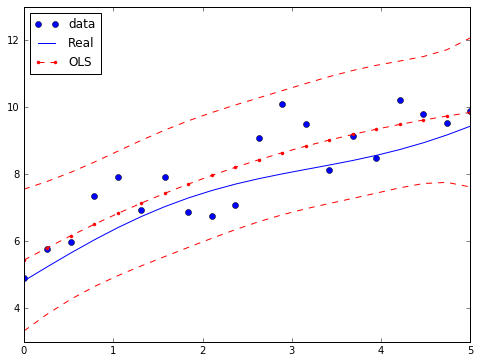

In [7]:
prstd, iv_l, iv_u = wls_prediction_std(results)
#wls_prediction_std returns standard deviation and 
#confidence interval of my fitted model data

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="Real")
ax.plot(x, results.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best')